In [386]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [387]:
df=pd.read_csv("Airline_customer_satisfaction.csv")

In [388]:
df.head(4)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0


In [389]:
df.shape

(129880, 22)

In [390]:
df.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

In [391]:

object_cols = []
for col in df.columns:
    if df[col].dtype == 'object':
        object_cols.append(col)

In [392]:
object_cols

['satisfaction', 'Customer Type', 'Type of Travel', 'Class']

In [393]:
df.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [394]:
df['Arrival Delay in Minutes']

0           0.0
1         305.0
2           0.0
3           0.0
4           0.0
          ...  
129875      0.0
129876    172.0
129877    163.0
129878    205.0
129879    186.0
Name: Arrival Delay in Minutes, Length: 129880, dtype: float64

In [395]:
data=df.copy()
y=data["satisfaction"]

UNIVARIATE ANALYSIS

In [396]:
data["Type of Travel"].value_counts()

Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64

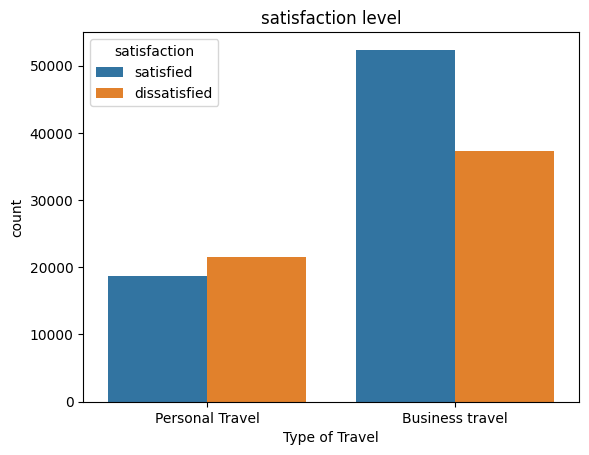

In [397]:
sns.countplot(x=df["Type of Travel"],hue=y,data=data)
plt.title("satisfaction level")
plt.show()

In [398]:
count=0
for i in data['Type of Travel']:
    if i == 'Business travel':
        count+=1


In [399]:
count

89693

In [400]:
new_data = data[["Type of Travel", "satisfaction"]]

In [401]:
new_data.head()

,Type of Travel,satisfaction
0,Personal Travel,satisfied
1,Personal Travel,satisfied
2,Personal Travel,satisfied
3,Personal Travel,satisfied
4,Personal Travel,satisfied


In [402]:
satisfied_business_travelers = new_data[(new_data['Type of Travel'] == 'Business travel') & (new_data['satisfaction'] == 'satisfied')]
num_satisfied_business_travelers = len(satisfied_business_travelers)

In [403]:
num_satisfied_business_travelers

52356

In [404]:
(52356/89693)*100#here the 58.37 per of the people in bussiness travel satisfied


58.37244824010792

In [405]:
columns=data.columns

In [406]:
columns

Index(['satisfaction', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [407]:
data['Customer Type']

0            Loyal Customer
1            Loyal Customer
2            Loyal Customer
3            Loyal Customer
4            Loyal Customer
                ...        
129875    disloyal Customer
129876    disloyal Customer
129877    disloyal Customer
129878    disloyal Customer
129879    disloyal Customer
Name: Customer Type, Length: 129880, dtype: object

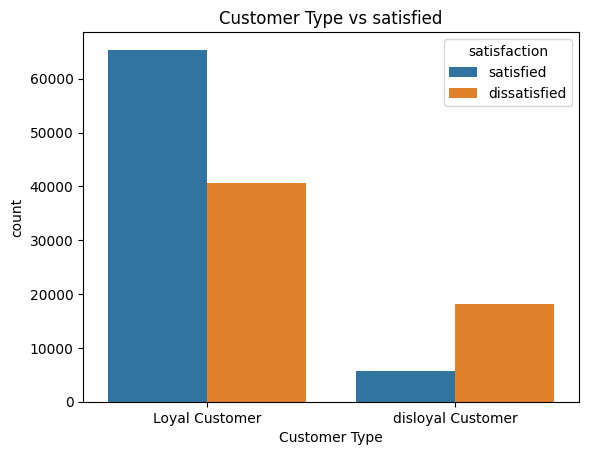

In [408]:
sns.countplot(x=data['Customer Type'],hue=y,data=data)
plt.title('Customer Type vs satisfied')
plt.show()

In [409]:
data.Class.value_counts()

Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64

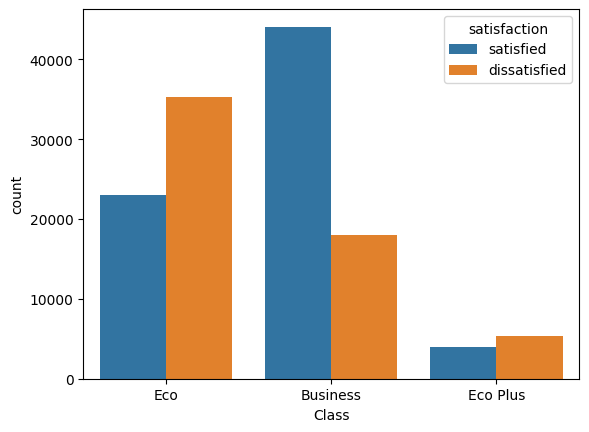

In [410]:
sns.countplot(x=data.Class,hue=y,data=data)
plt.show()

In [411]:
len(data[(data.Class=="Business")])

62160

In [412]:
columns

Index(['satisfaction', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [413]:
data["Flight Distance"]

0          265
1         2464
2         2138
3          623
4          354
          ... 
129875    1731
129876    2087
129877    2320
129878    2450
129879    4307
Name: Flight Distance, Length: 129880, dtype: int64

In [414]:
max(data["Flight Distance"])

6951

In [415]:
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000]
labels = ['1-1000', '1001-2000', '2001-3000', '3001-4000', '4001-5000', '5001-6000', '6001-7000']

data['distance_group'] = pd.cut(data["Flight Distance"], bins=bins, labels=labels, include_lowest=True)

In [416]:
data['distance_group']

0            1-1000
1         2001-3000
2         2001-3000
3            1-1000
4            1-1000
            ...    
129875    1001-2000
129876    2001-3000
129877    2001-3000
129878    2001-3000
129879    4001-5000
Name: distance_group, Length: 129880, dtype: category
Categories (7, object): ['1-1000' < '1001-2000' < '2001-3000' < '3001-4000' < '4001-5000' < '5001-6000' < '6001-7000']

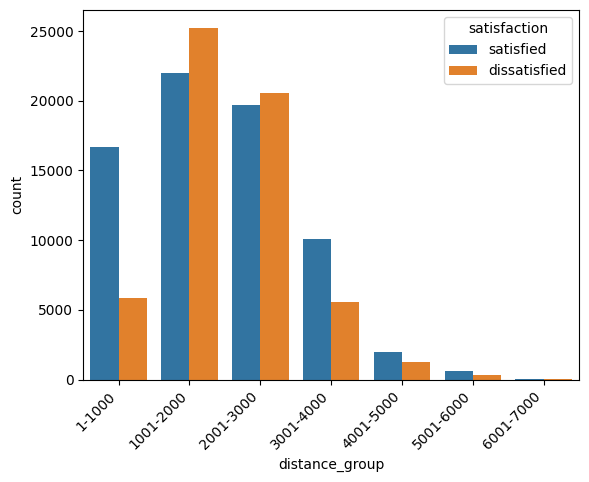

In [417]:
sns.countplot(x=data['distance_group'],hue=y,data=data)

plt.xticks(rotation=45, ha='right', fontsize=10)

plt.show()

In [418]:
columns

Index(['satisfaction', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [419]:
data["Seat comfort"]

0         0
1         0
2         0
3         0
4         0
         ..
129875    5
129876    2
129877    3
129878    3
129879    3
Name: Seat comfort, Length: 129880, dtype: int64

In [420]:
data["Seat comfort"].value_counts()

3    29183
2    28726
4    28398
1    20949
5    17827
0     4797
Name: Seat comfort, dtype: int64

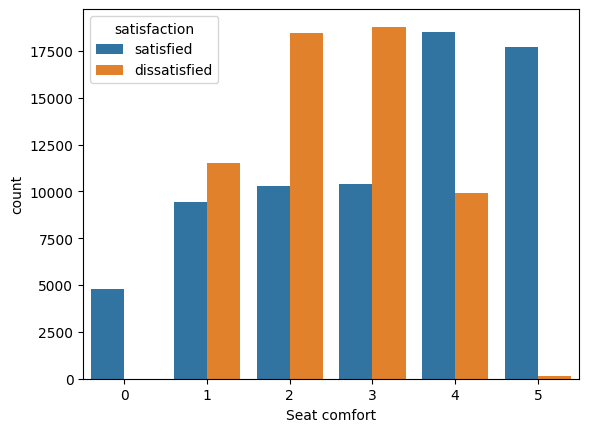

In [421]:
sns.countplot(x=data["Seat comfort"],hue=y,data=data)
plt.show()

satisfaction
Customer Type
Type of Travel
Class
Seat comfort
Departure/Arrival time convenient
Food and drink
Gate location
Inflight wifi service
Inflight entertainment
Online support
Ease of Online booking
On-board service
Leg room service
Baggage handling
Checkin service
Cleanliness
Online boarding
distance_group


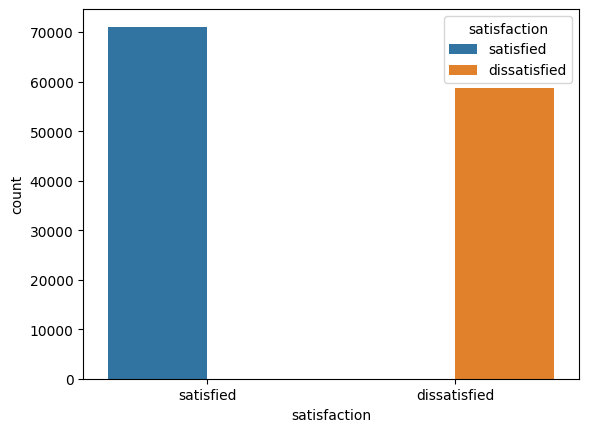

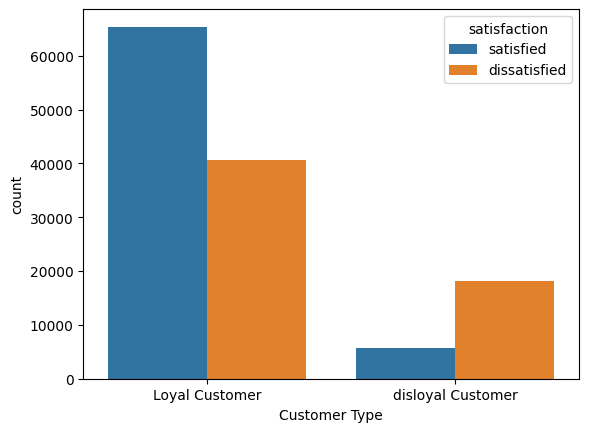

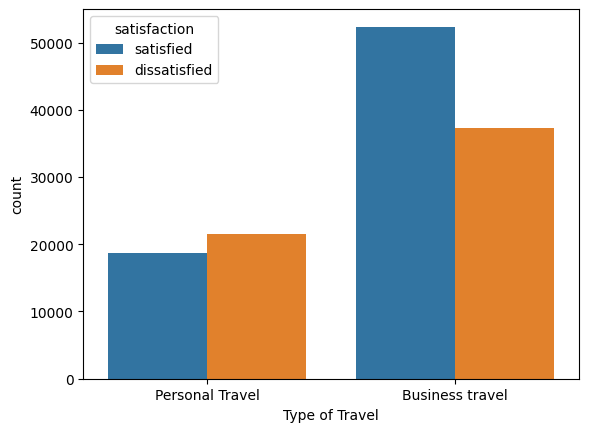

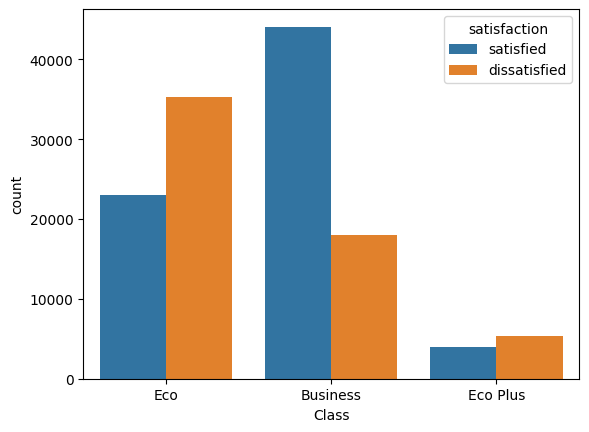

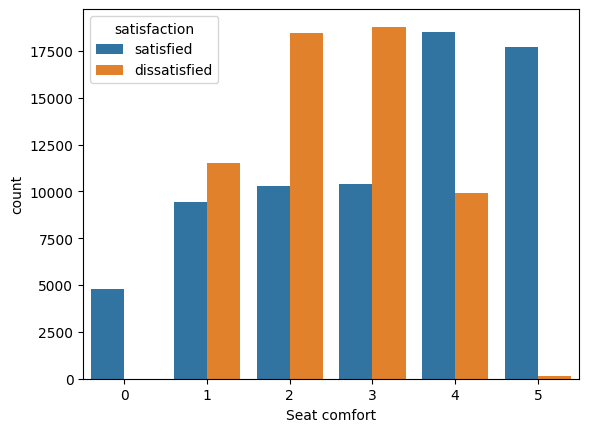

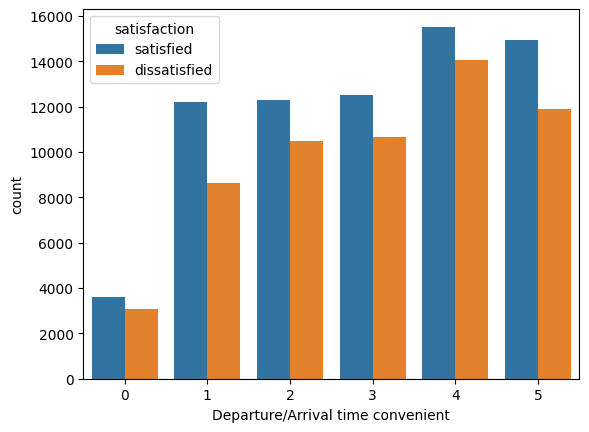

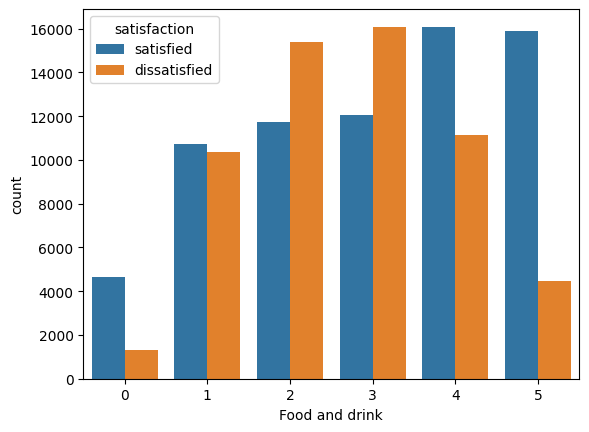

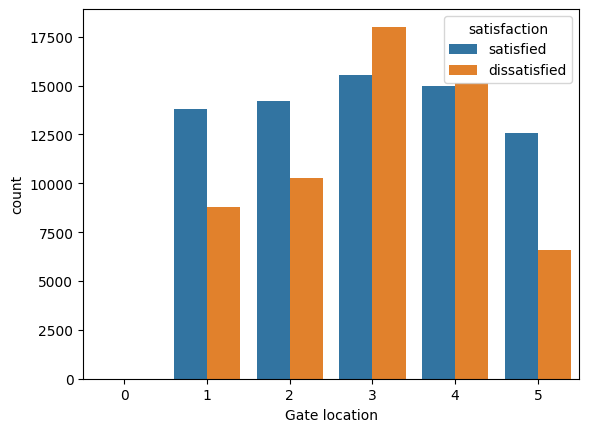

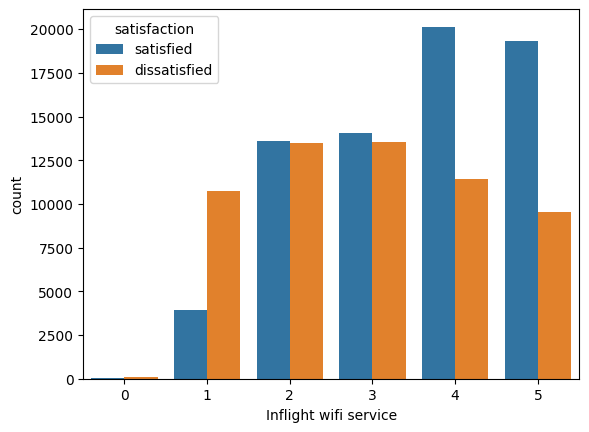

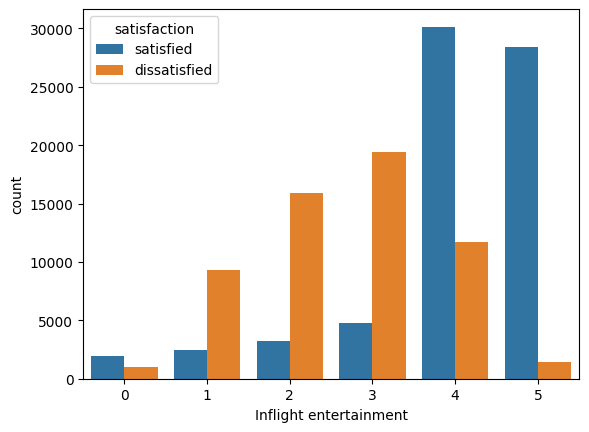

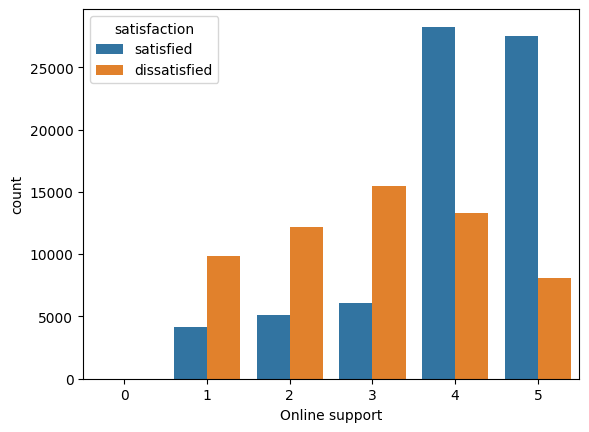

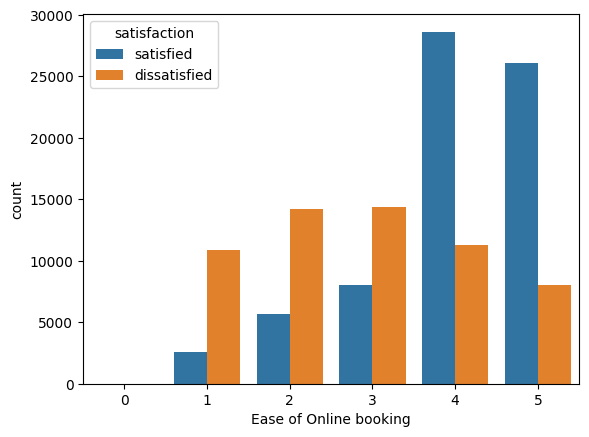

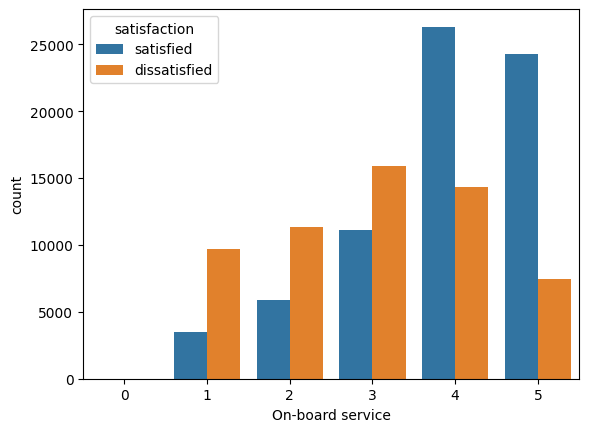

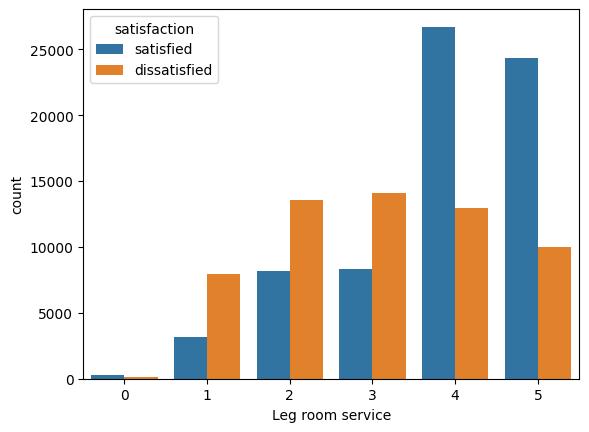

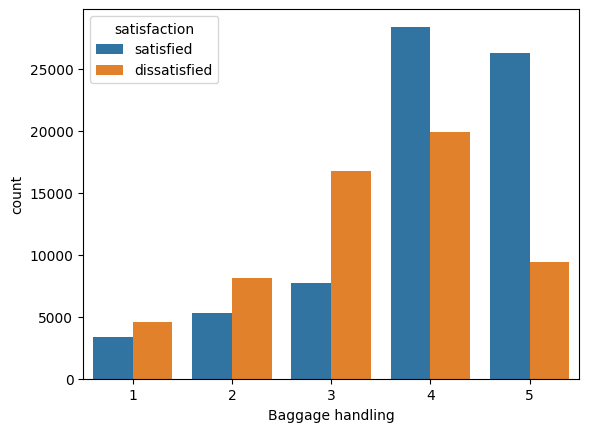

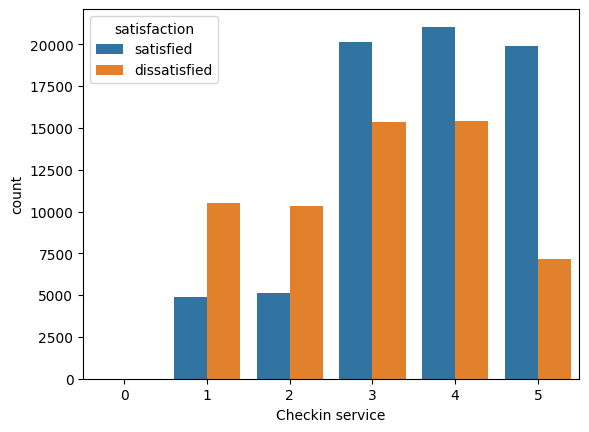

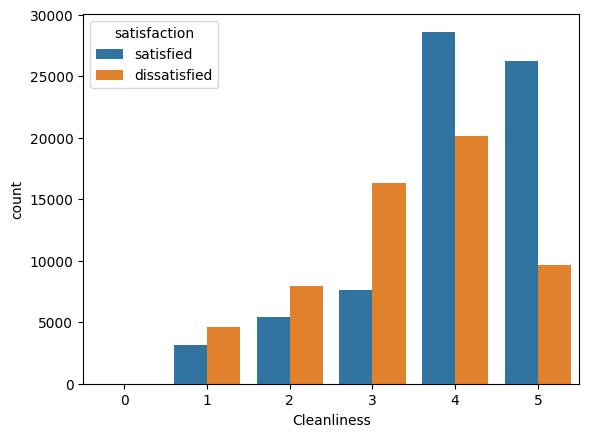

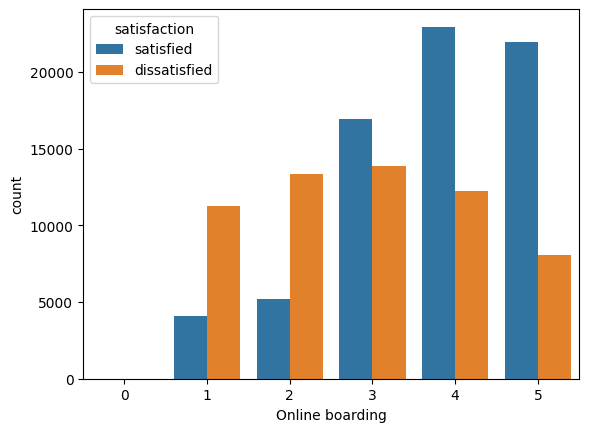

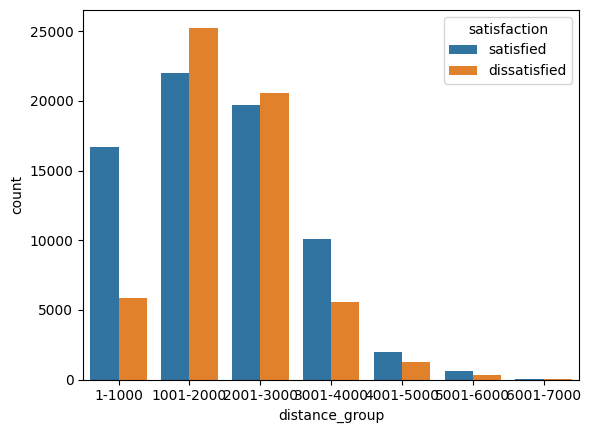

In [422]:
for i, predictor in enumerate(data.drop(columns=["Flight Distance","Age","Departure Delay in Minutes",
"Arrival Delay in Minutes"])):
    plt.figure(i)
    sns.countplot(data=data, x=predictor, hue=y)
    print(predictor)

BIVARIATE ANALYSIS

In [423]:
columns

Index(['satisfaction', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [424]:
columns

Index(['satisfaction', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [425]:
data.Age.max()

85

In [426]:
data.Age.min()

7

In [427]:
bins = [0, 15, 30, 45, 60, 75, 90]
labels = ['1-15', '16-30', '31-45', '46-60', '61-75', '76-90']

data['new_Age'] = pd.cut(data["Age"], bins=bins, labels=labels, include_lowest=True)

In [428]:
data.new_Age

0         61-75
1         46-60
2          1-15
3         46-60
4         61-75
          ...  
129875    16-30
129876    61-75
129877    61-75
129878    61-75
129879    31-45
Name: new_Age, Length: 129880, dtype: category
Categories (6, object): ['1-15' < '16-30' < '31-45' < '46-60' < '61-75' < '76-90']

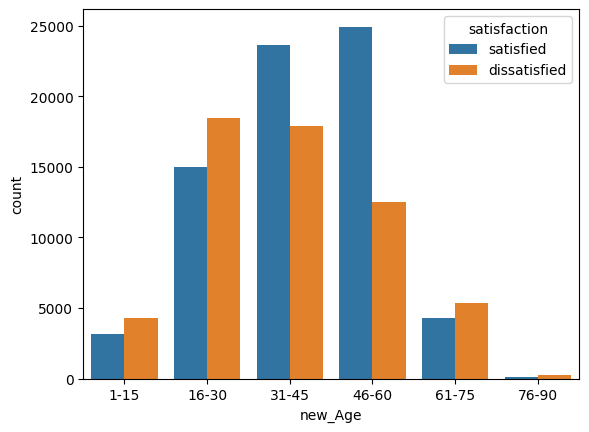

In [429]:
sns.countplot(x=data['new_Age'],hue=y,data=data)
plt.show()

In [430]:
data['new_Age'].value_counts()
    

31-45    41482
46-60    37464
16-30    33414
61-75     9657
1-15      7466
76-90      397
Name: new_Age, dtype: int64

In [431]:
data["new_Age"].values

['61-75', '46-60', '1-15', '46-60', '61-75', ..., '16-30', '61-75', '61-75', '61-75', '31-45']
Length: 129880
Categories (6, object): ['1-15' < '16-30' < '31-45' < '46-60' < '61-75' < '76-90']

In [432]:
vas=0
for i in data.Age:
    if i>75:
        vas+=1
print(vas)

397


In [433]:
food_drink=data.groupby(['Class','Food and drink','satisfaction']).size()

In [434]:
food_drink

Class     Food and drink  satisfaction
Business  0               dissatisfied      260
                          satisfied        2398
          1               dissatisfied     3204
                          satisfied        7056
          2               dissatisfied     4397
                          satisfied        7807
          3               dissatisfied     4514
                          satisfied        7969
          4               dissatisfied     3377
                          satisfied        9587
          5               dissatisfied     2313
                          satisfied        9278
Eco       0               dissatisfied      925
                          satisfied        1902
          1               dissatisfied     6206
                          satisfied        3052
          2               dissatisfied     9681
                          satisfied        3300
          3               dissatisfied    10156
                          satisfied        3451
 

In [435]:
data['Class'].value_counts()

Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64

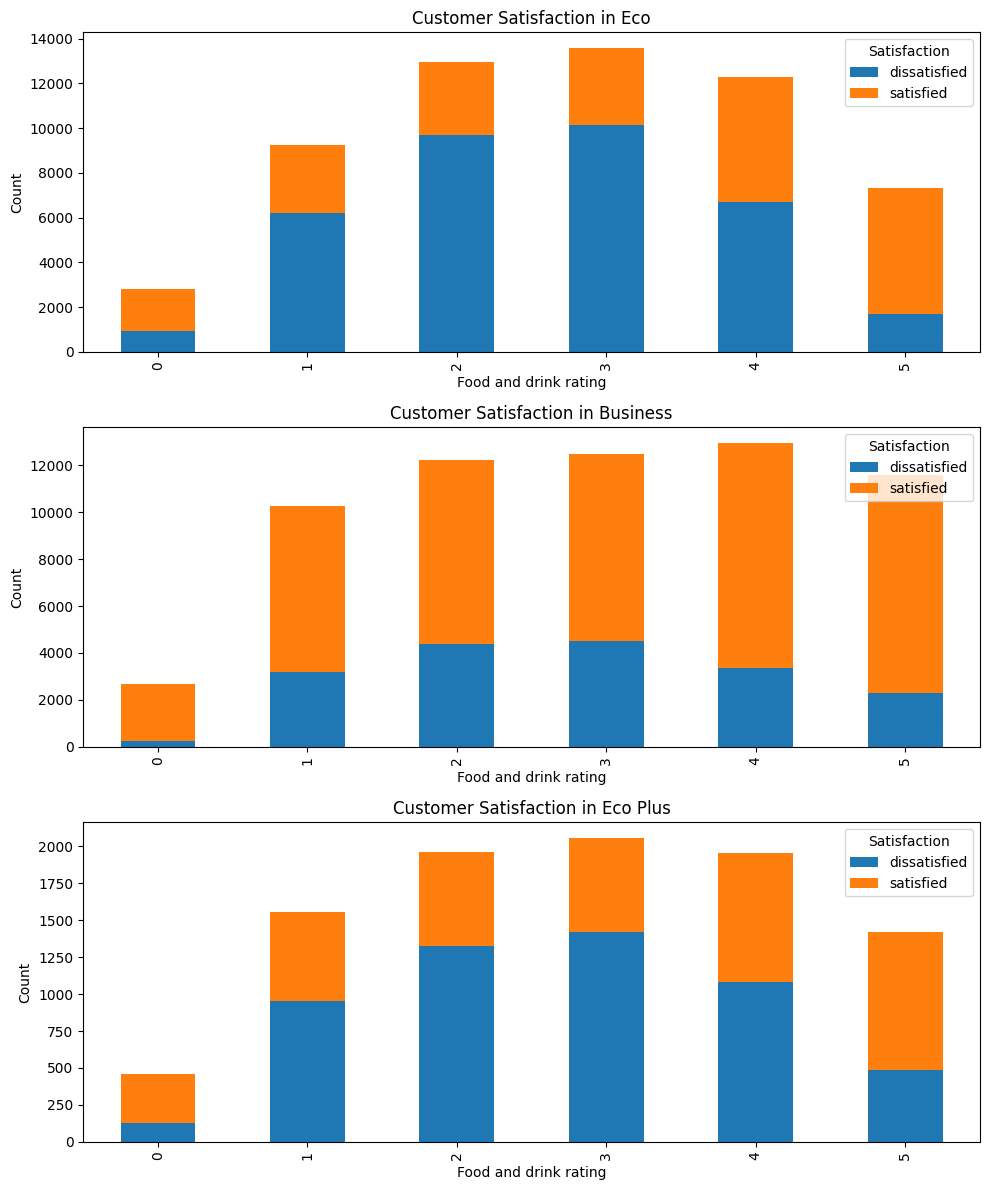

In [436]:


# Group by Class, Food and drink rating, and Satisfaction
grouped = data.groupby(['Class','Food and drink','satisfaction']).size().unstack(fill_value=0)

# Plotting
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

for i, cls in enumerate(df['Class'].unique()):
    ax = axes[i]
    subset = grouped.loc[cls]
    subset.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'Customer Satisfaction in {cls}')
    ax.set_xlabel('Food and drink rating')
    ax.set_ylabel('Count')
    ax.legend(title='Satisfaction', loc='upper right')

plt.tight_layout()
plt.show()


In [437]:
columns

Index(['satisfaction', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [438]:
data['Departure/Arrival time convenient'].value_counts()

4    29593
5    26817
3    23184
2    22794
1    20828
0     6664
Name: Departure/Arrival time convenient, dtype: int64

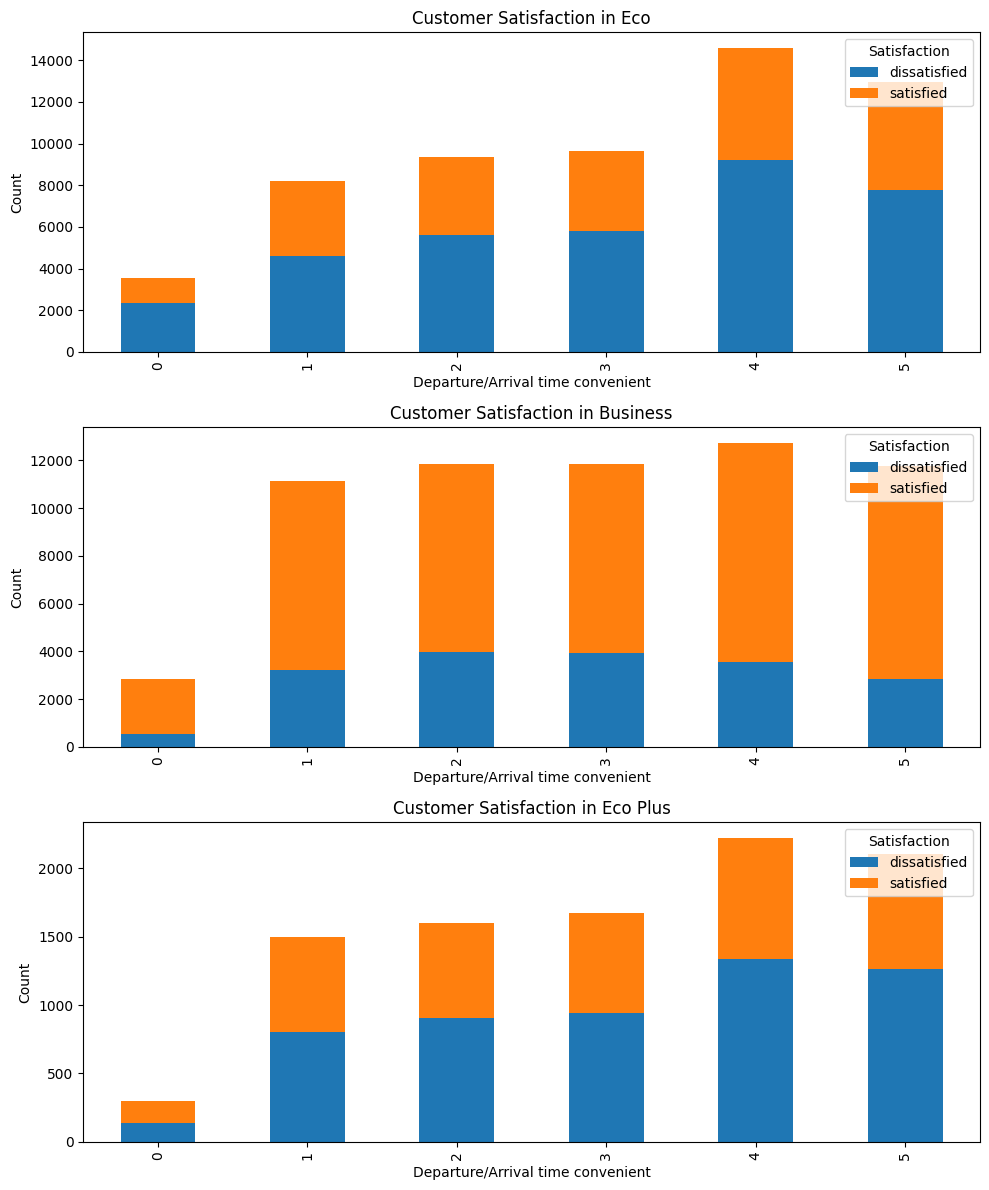

In [439]:
arrival_time = data.groupby(['Class','Departure/Arrival time convenient','satisfaction']).size().unstack(fill_value=0)

# Plotting
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

for i, cls in enumerate(df['Class'].unique()):
    ax = axes[i]
    subset = arrival_time.loc[cls]
    subset.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'Customer Satisfaction in {cls}')
    ax.set_xlabel('Departure/Arrival time convenient')
    ax.set_ylabel('Count')
    ax.legend(title='Satisfaction', loc='upper right')

plt.tight_layout()
plt.show()

In [440]:
data['distance_group']

0            1-1000
1         2001-3000
2         2001-3000
3            1-1000
4            1-1000
            ...    
129875    1001-2000
129876    2001-3000
129877    2001-3000
129878    2001-3000
129879    4001-5000
Name: distance_group, Length: 129880, dtype: category
Categories (7, object): ['1-1000' < '1001-2000' < '2001-3000' < '3001-4000' < '4001-5000' < '5001-6000' < '6001-7000']

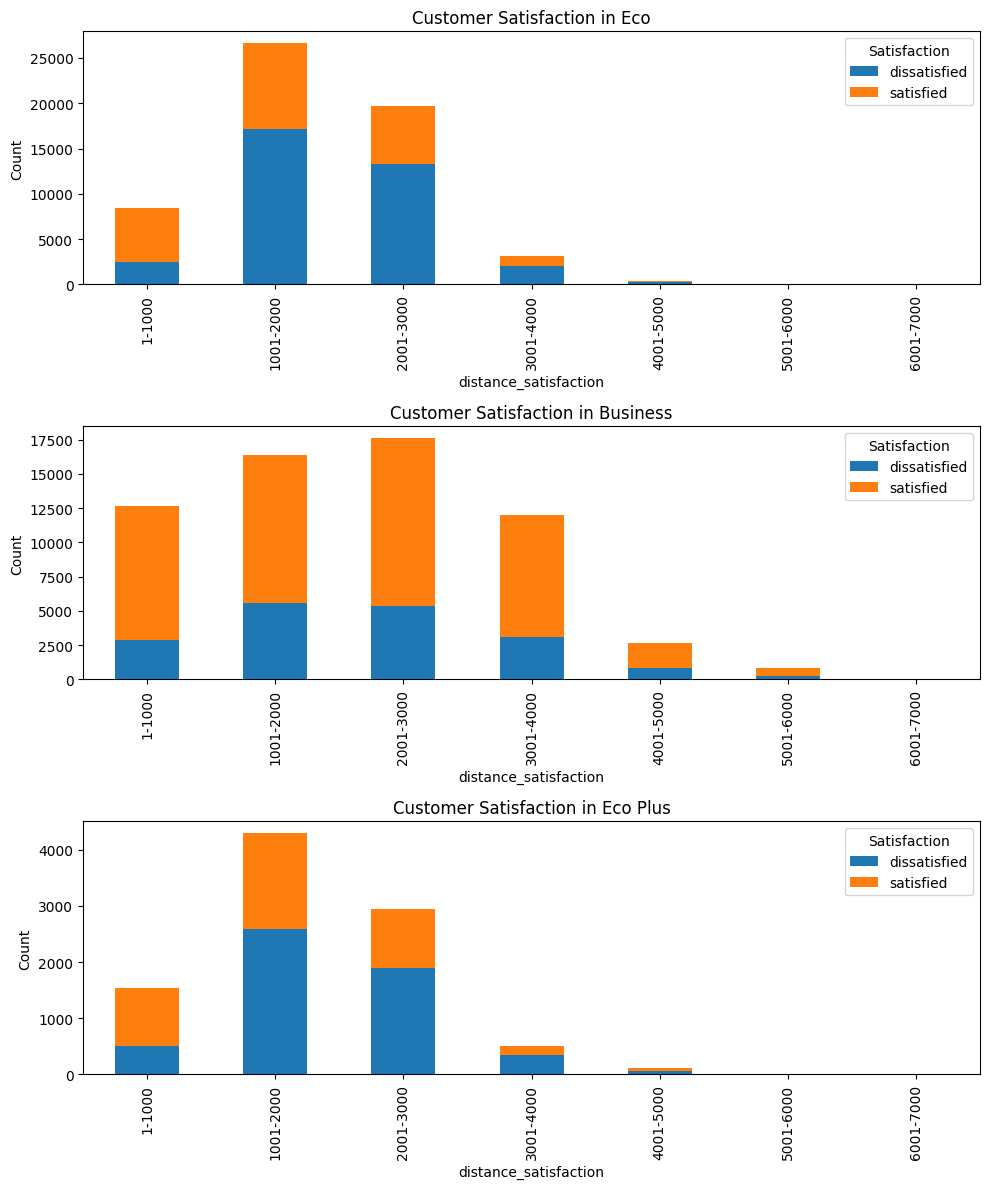

In [441]:

distance_satisfaction = data.groupby(['Class','distance_group','satisfaction']).size().unstack(fill_value=0)

# Plotting
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

for i, cls in enumerate(df['Class'].unique()):
    ax = axes[i]
    subset = distance_satisfaction.loc[cls]
    subset.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'Customer Satisfaction in {cls}')
    ax.set_xlabel('distance_satisfaction')
    ax.set_ylabel('Count')
    ax.legend(title='Satisfaction', loc='upper right')

plt.tight_layout()
plt.show()

In [442]:
columns

Index(['satisfaction', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [443]:
#here the variable called new_cols made to get all the column name in the list
new_cols=['Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding']
# data.groupby(['Class','distance_group','satisfaction']).size().unstack(fill_value=0) 
#the following code generate the list with the different middle variavle in  data.groupby(['Class','distance_group','satisfaction']).size().unstack(fill_value=0)

var=[]
for i in new_cols:
     var.append('Class')
     var.append(i)
     var.append('satisfaction')



In [444]:
#here the new_var is create for storing the list of variable in correct postion because 
#the listt should be created in the format like
#['Class', 'Gate location', 'satisfaction'],['Class', 'Inflight wifi service', 'satisfaction'] like that
new_var=[var[i:i+3] for i in range(0, len(var), 3)]
new_var


[['Class', 'Gate location', 'satisfaction'],
 ['Class', 'Inflight wifi service', 'satisfaction'],
 ['Class', 'Inflight entertainment', 'satisfaction'],
 ['Class', 'Online support', 'satisfaction'],
 ['Class', 'Ease of Online booking', 'satisfaction'],
 ['Class', 'On-board service', 'satisfaction'],
 ['Class', 'Leg room service', 'satisfaction'],
 ['Class', 'Baggage handling', 'satisfaction'],
 ['Class', 'Checkin service', 'satisfaction'],
 ['Class', 'Cleanliness', 'satisfaction'],
 ['Class', 'Online boarding', 'satisfaction']]

In [445]:
#here the variable is created to store the new variable name
new_variable=[i[1]+"_satisfaction" for i in new_var]


In [446]:
new_variable


['Gate location_satisfaction',
 'Inflight wifi service_satisfaction',
 'Inflight entertainment_satisfaction',
 'Online support_satisfaction',
 'Ease of Online booking_satisfaction',
 'On-board service_satisfaction',
 'Leg room service_satisfaction',
 'Baggage handling_satisfaction',
 'Checkin service_satisfaction',
 'Cleanliness_satisfaction',
 'Online boarding_satisfaction']

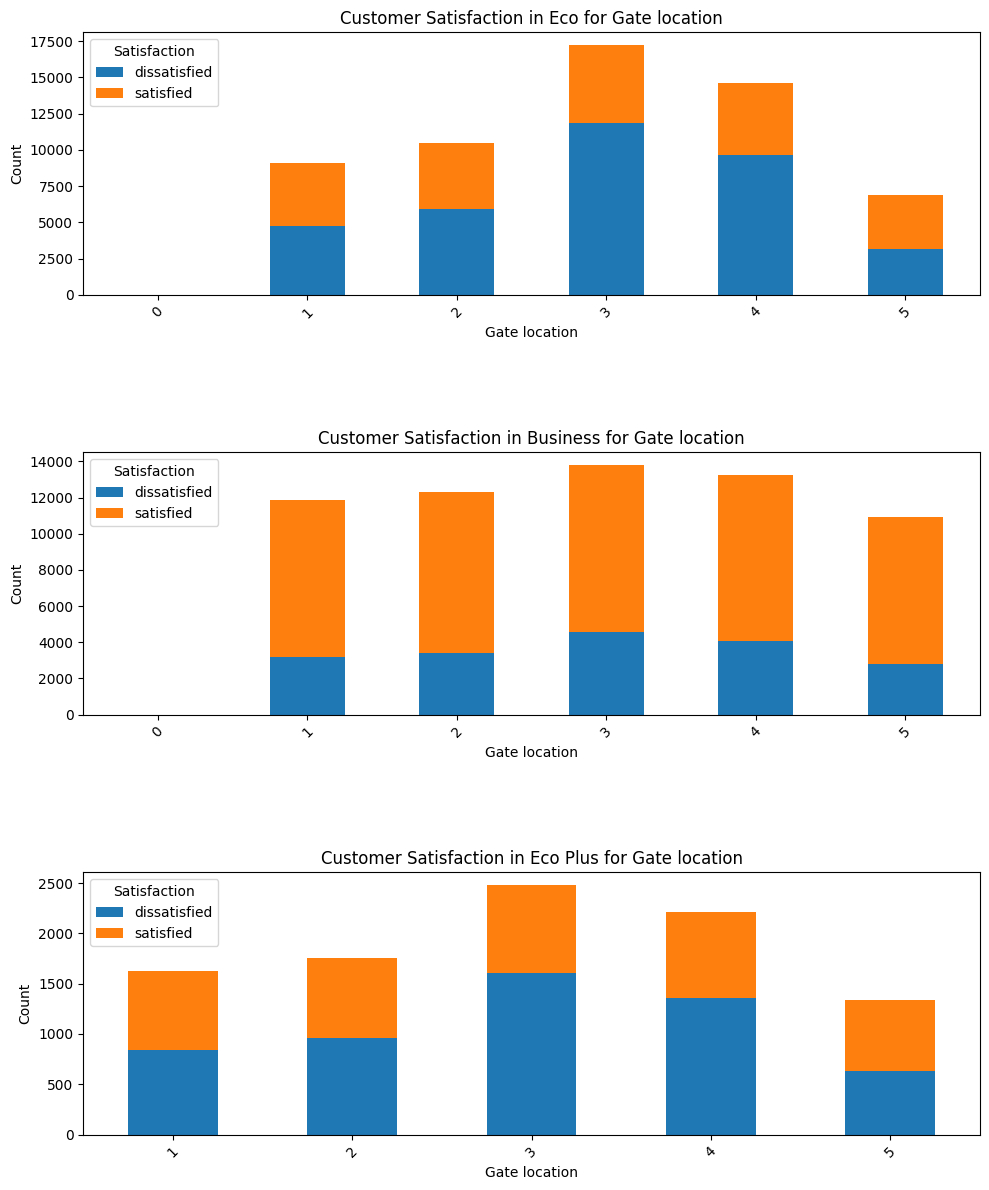

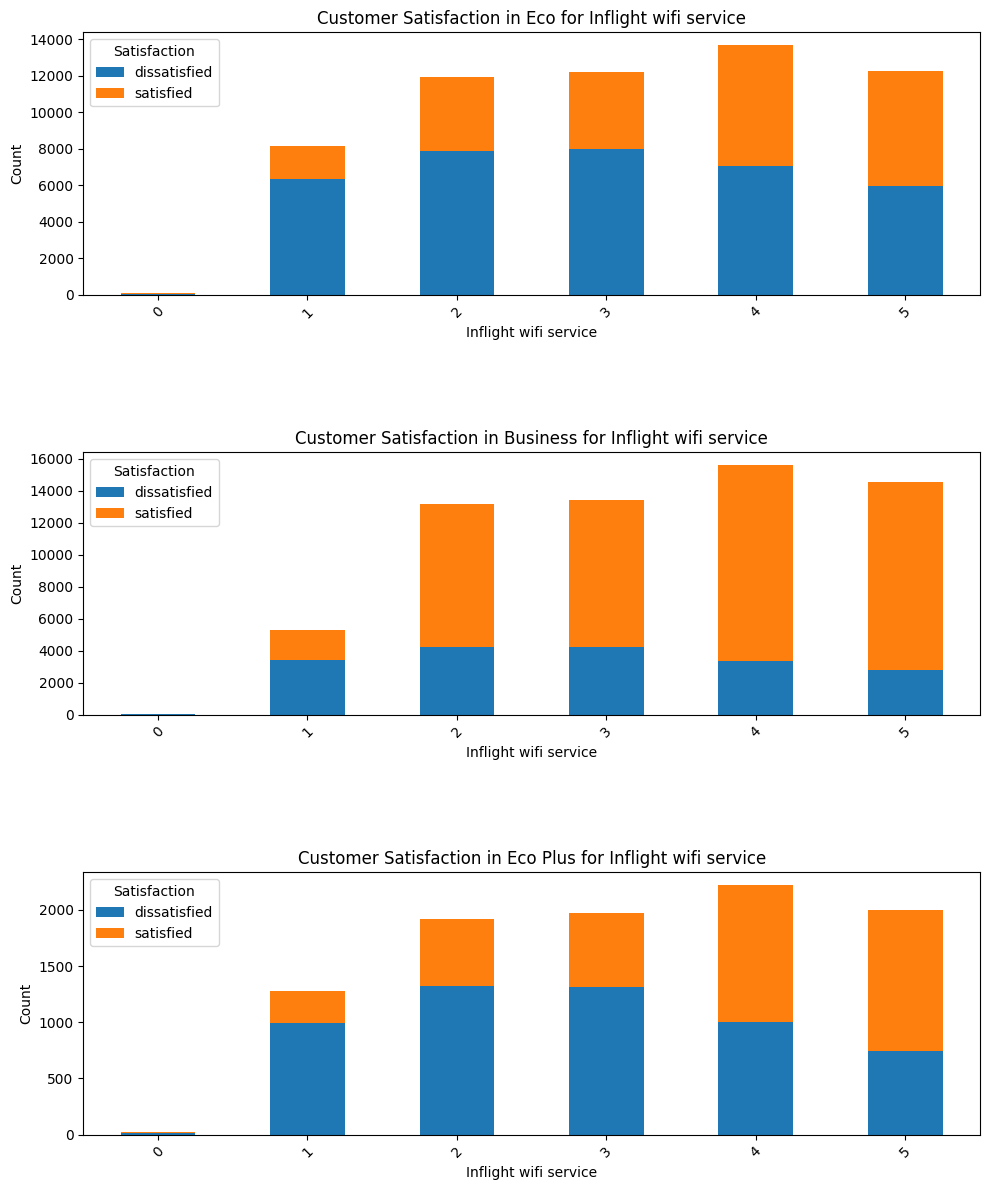

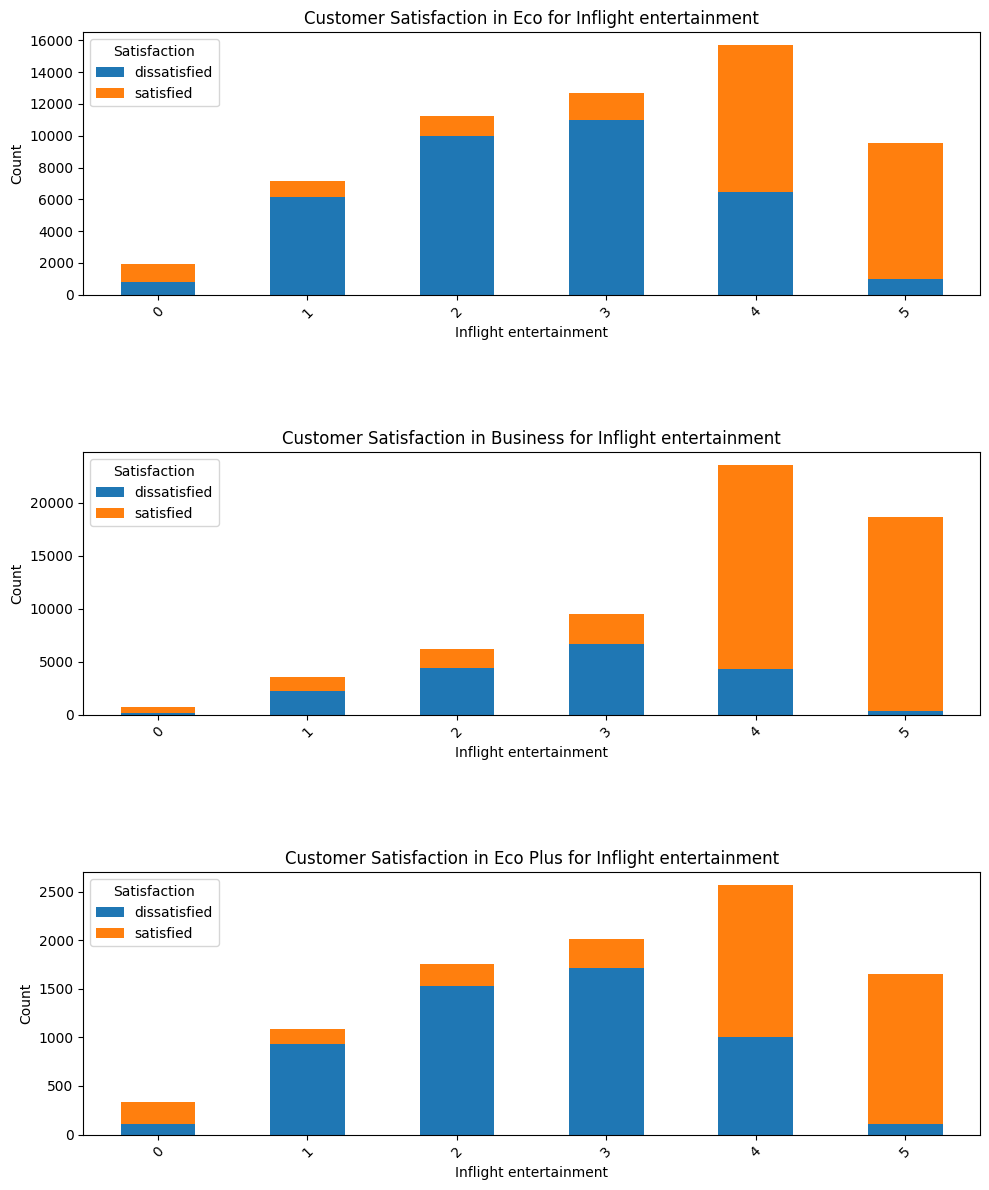

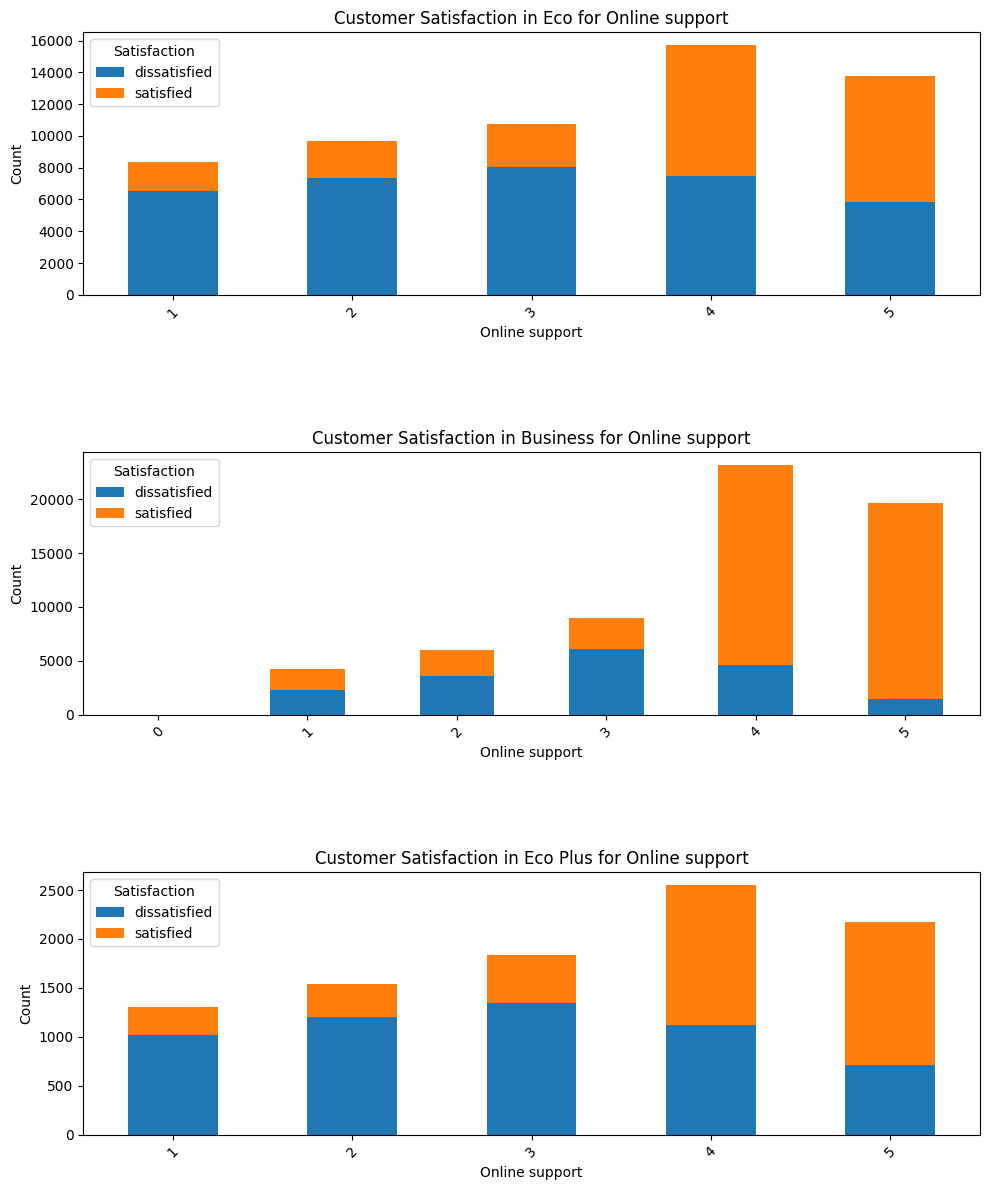

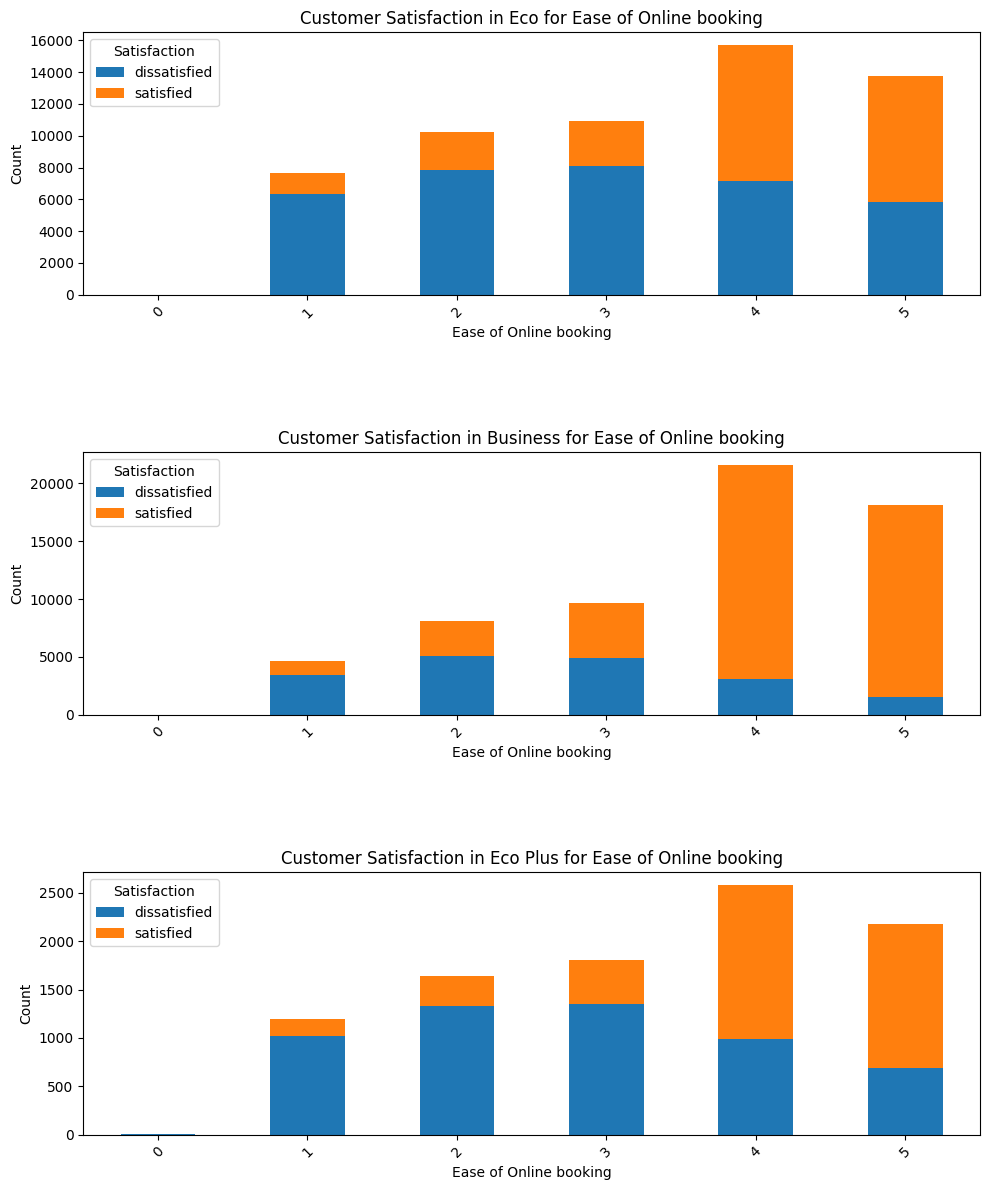

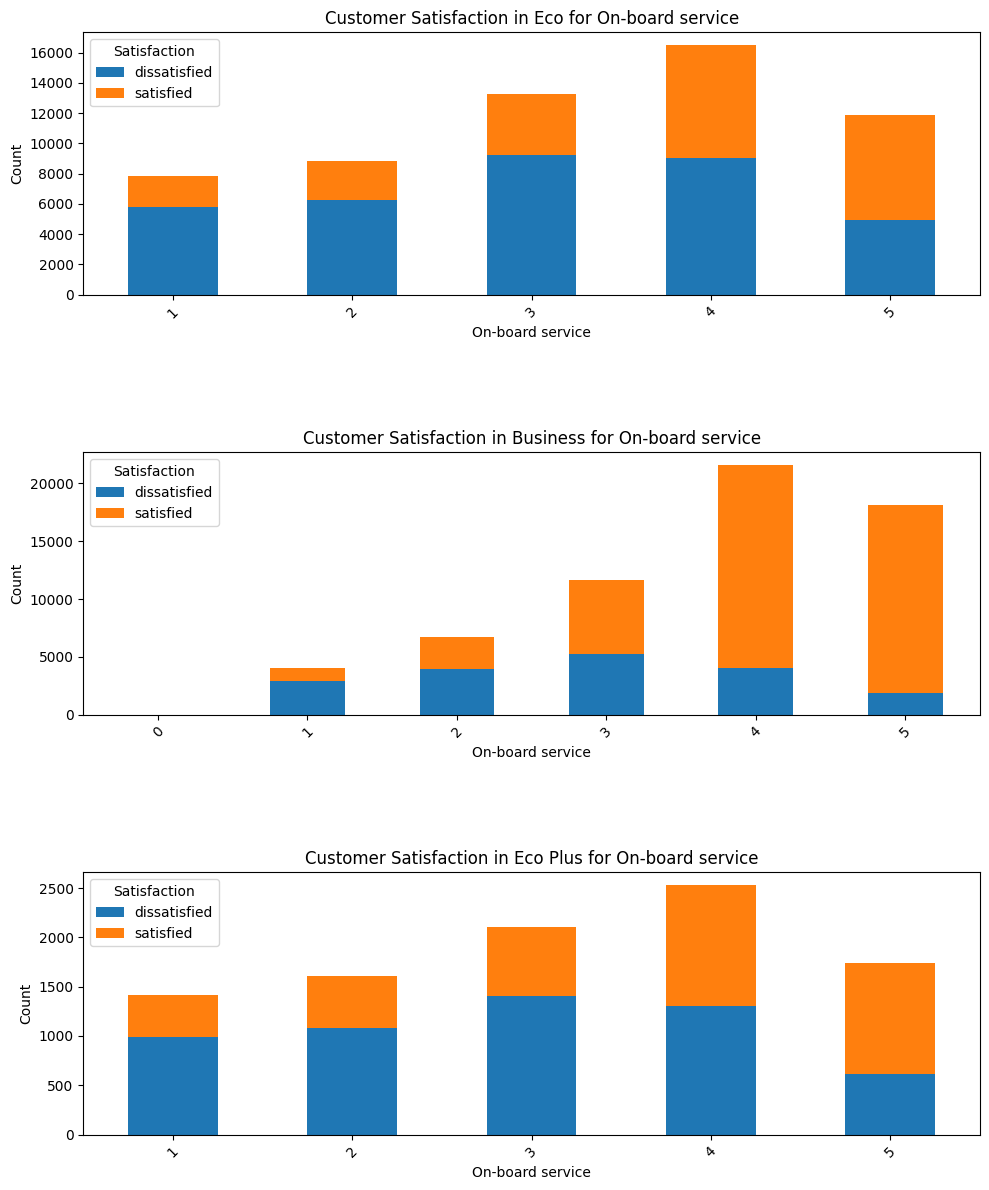

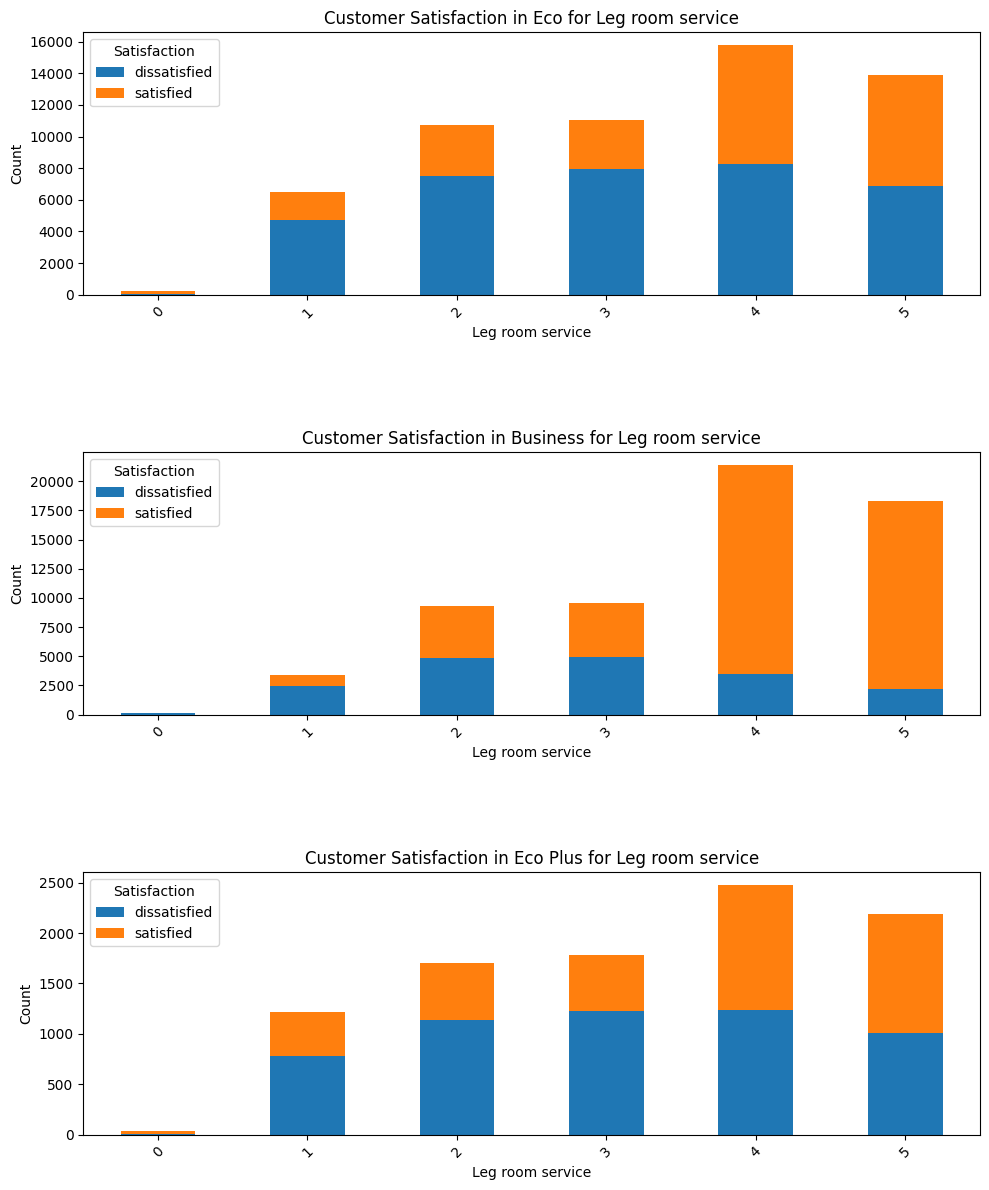

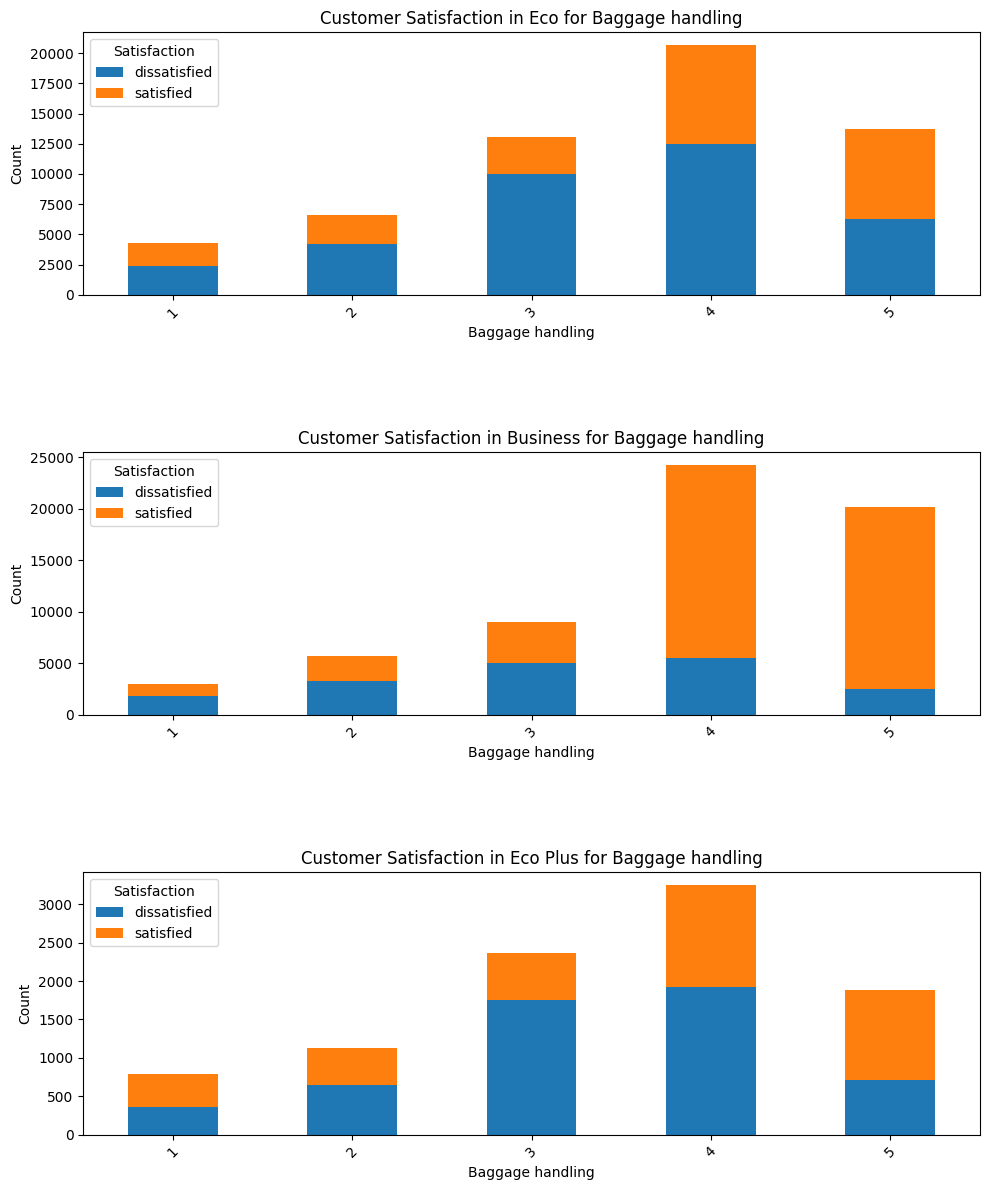

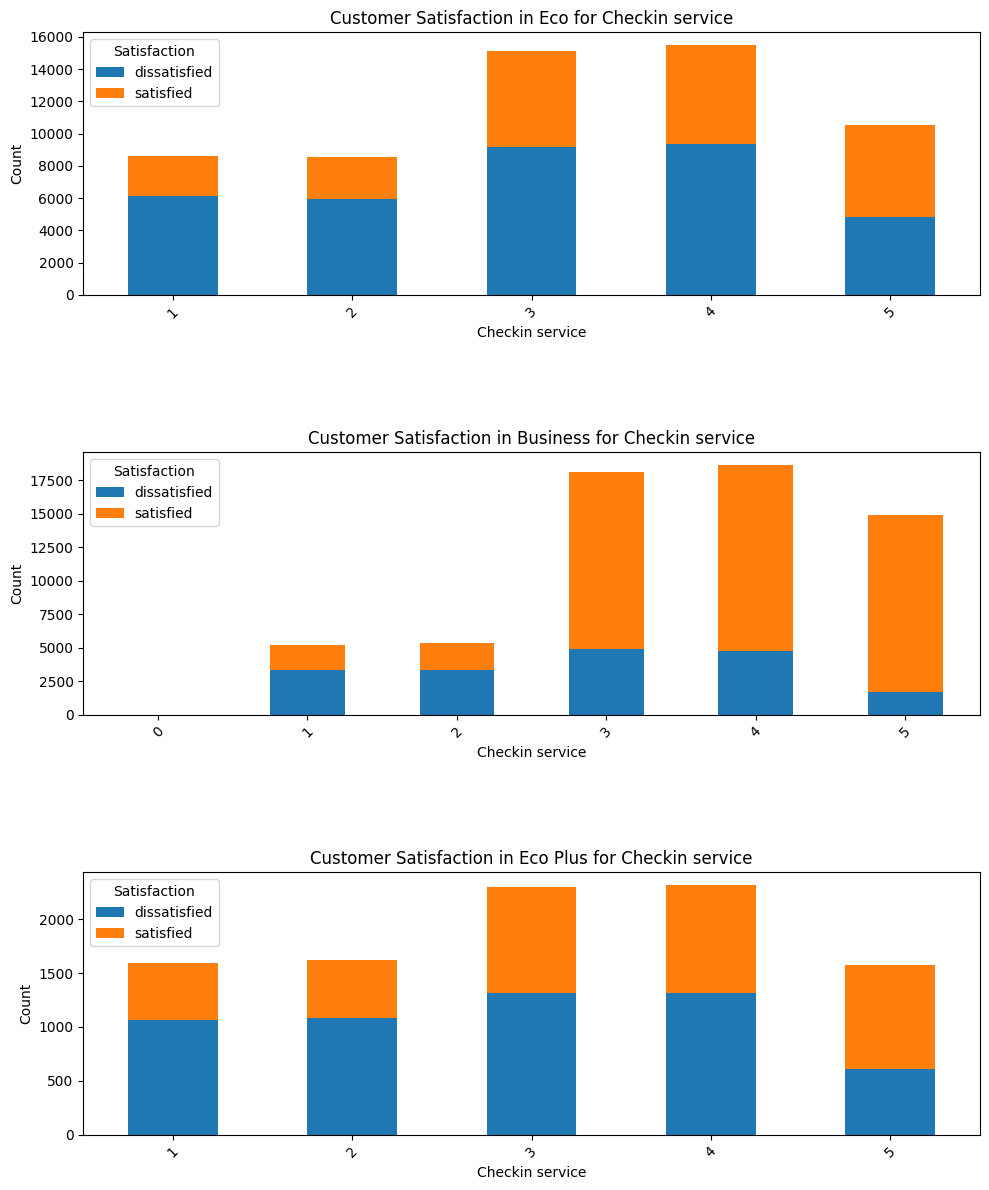

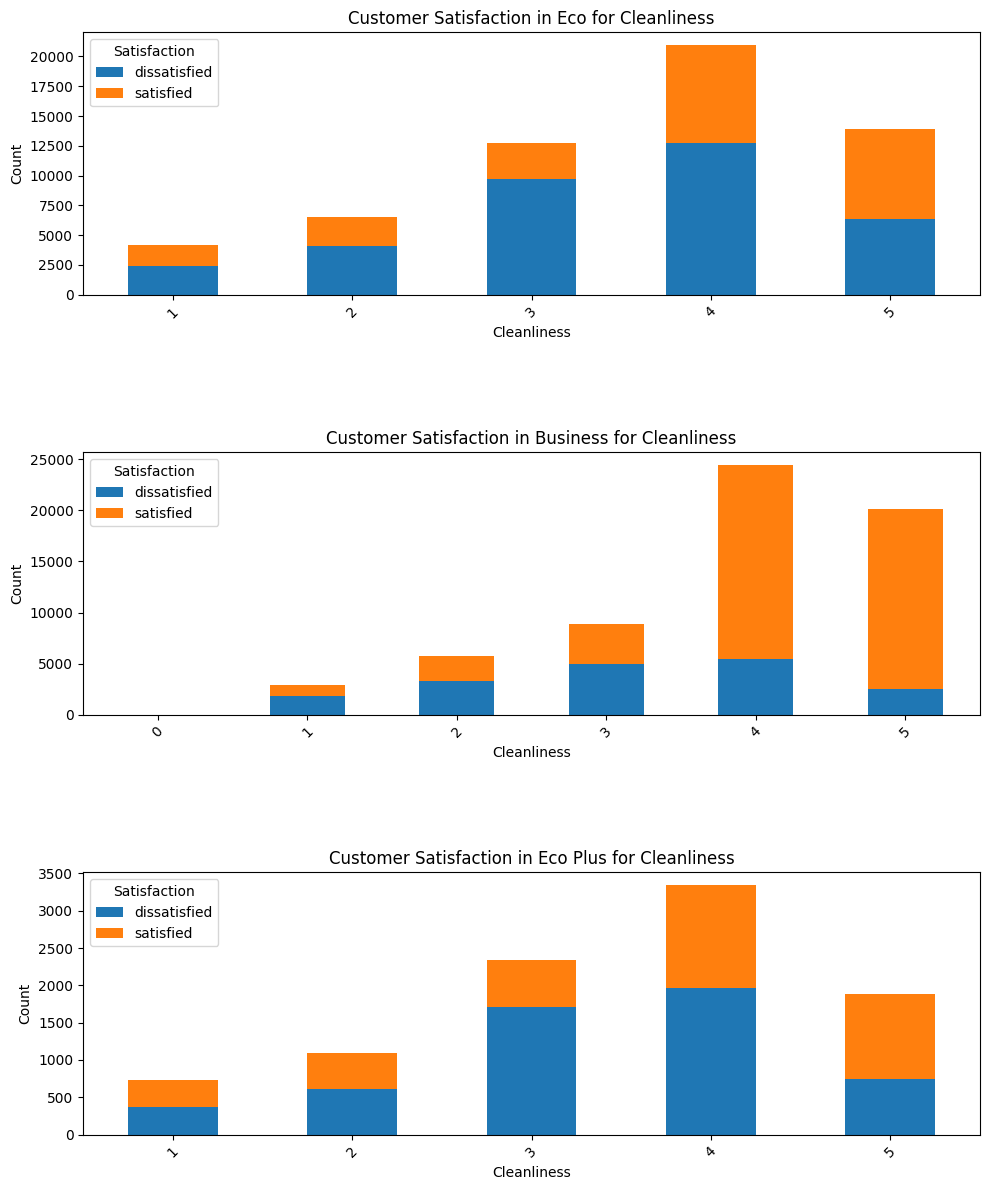

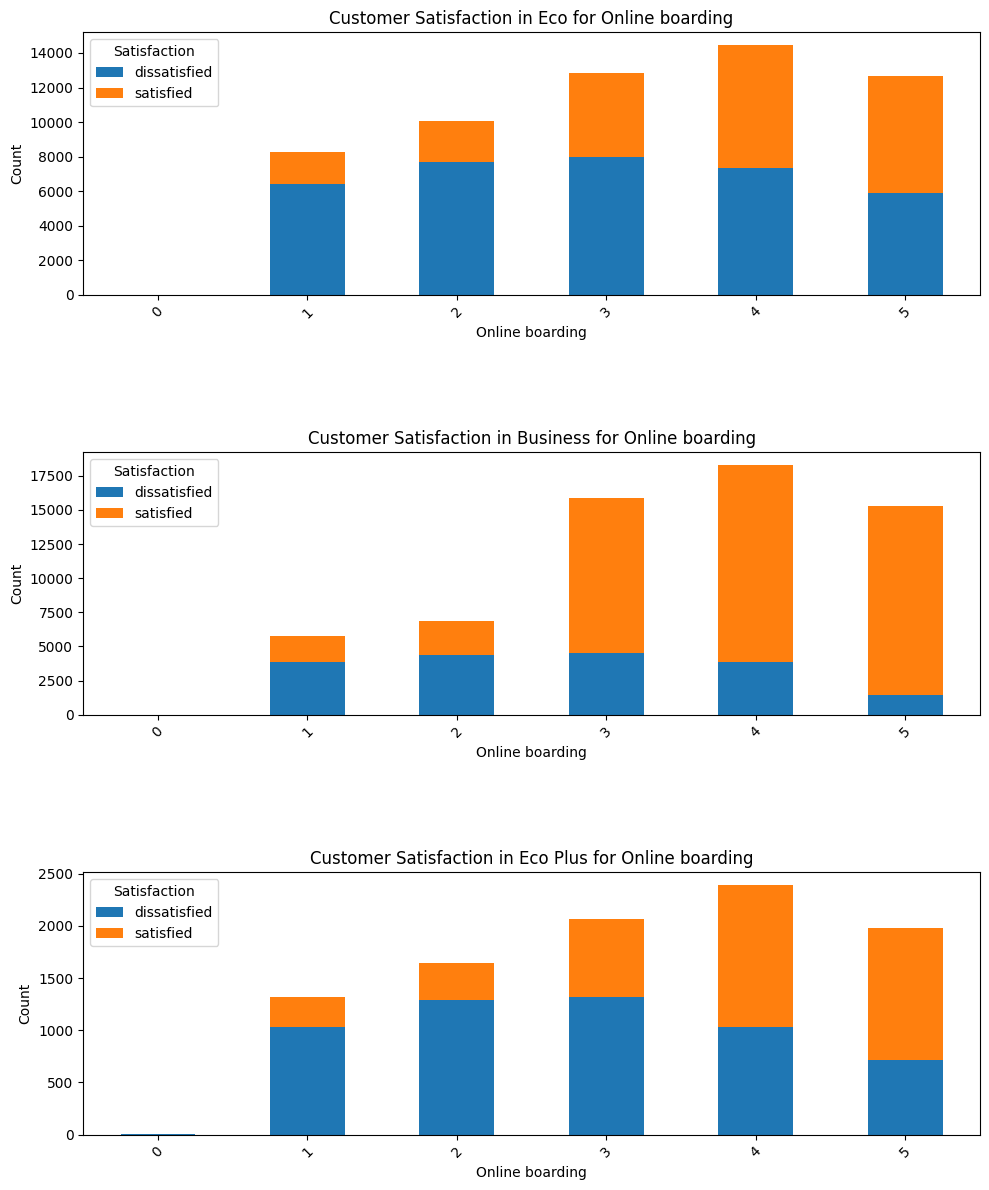

In [447]:
# List of new variables
new_var = [['Class', 'Gate location', 'satisfaction'],
           ['Class', 'Inflight wifi service', 'satisfaction'],
           ['Class', 'Inflight entertainment', 'satisfaction'],
           ['Class', 'Online support', 'satisfaction'],
           ['Class', 'Ease of Online booking', 'satisfaction'],
           ['Class', 'On-board service', 'satisfaction'],
           ['Class', 'Leg room service', 'satisfaction'],
           ['Class', 'Baggage handling', 'satisfaction'],
           ['Class', 'Checkin service', 'satisfaction'],
           ['Class', 'Cleanliness', 'satisfaction'],
           ['Class', 'Online boarding', 'satisfaction']]
for vars in new_var:
    grouped_data = data.groupby(vars).size().unstack(fill_value=0)
    
    # Create subplots for each class
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

    for i, cls in enumerate(data['Class'].unique()):
        ax = axes[i]
        subset = grouped_data.loc[cls]
        subset.plot(kind='bar', stacked=True, ax=ax)
        ax.set_title(f'Customer Satisfaction in {cls} for {vars[1]}')
        ax.set_xlabel(vars[1])
        ax.set_ylabel('Count')
        ax.legend(title='Satisfaction', loc='upper left')
        # Rotate x-axis labels for better readability
        for label in ax.get_xticklabels():
            label.set_rotation(45)

    plt.tight_layout()
    plt.subplots_adjust(hspace=0.6)  # Increase space between rows
    plt.show()


In [448]:
 subset = grouped_data.loc[cls]

In [449]:
subset

satisfaction,dissatisfied,satisfied
Online boarding,,
0,6,0
1,1028,291
2,1293,355
3,1319,745
4,1035,1361
5,711,1267


In [450]:
data.columns

Index(['satisfaction', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'distance_group', 'new_Age'],
      dtype='object')

In [451]:
data=data.drop(columns=['distance_group', 'new_Age',])

In [452]:
data.columns

Index(['satisfaction', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [453]:
data.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

In [454]:

object = []
for col in data.columns:
    if data[col].dtype == 'object':
        object.append(col)

In [455]:
object

['satisfaction', 'Customer Type', 'Type of Travel', 'Class']

In [456]:
data.shape

(129880, 22)

In [457]:
data.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [458]:



data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median(), inplace=True)


In [459]:
data.isnull().sum()

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [460]:
data['Arrival Delay in Minutes'].isnull().sum()

0

In [461]:
data.satisfaction.value_counts()

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64

In [462]:
import pandas as pd
mapping = {'satisfied': 1, 'dissatisfied': 0}
data['Satisfaction_encoded'] = data['satisfaction'].map(mapping)


In [463]:
object

['satisfaction', 'Customer Type', 'Type of Travel', 'Class']

In [464]:
data['Customer Type'].value_counts()

Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64

In [465]:
customer_mapping = {'Loyal Customer': 1, 'disloyal Customer': 0}
data['customer_type_encoded'] = data['Customer Type'].map(customer_mapping)

In [466]:
data['Type of Travel'].value_counts()

Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64

In [467]:
travel_mapping = {'Business travel': 1, 'Personal Travel': 0}
data['travel_encoded'] = data['Type of Travel'].map(travel_mapping)

In [468]:
data['Class'].value_counts()

Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64

In [469]:
class_mapping = {'Business': 2, 'Eco': 0,'Eco Plus':1}
data['class_encoded'] = data['Class'].map(class_mapping)

In [470]:
data.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction_encoded,customer_type_encoded,travel_encoded,class_encoded
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,3,5,3,2,0,0.0,1,1,0,0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,4,2,3,2,310,305.0,1,1,0,2
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,4,4,4,2,0,0.0,1,1,0,0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,1,4,1,3,0,0.0,1,1,0,0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,2,4,2,5,0,0.0,1,1,0,0


In [471]:
object

['satisfaction', 'Customer Type', 'Type of Travel', 'Class']

In [472]:
data=data.drop(columns=['satisfaction', 'Customer Type', 'Type of Travel', 'Class'],axis=1)

In [474]:
data.head()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction_encoded,customer_type_encoded,travel_encoded,class_encoded
0,65,265,0,0,0,2,2,4,2,3,...,3,5,3,2,0,0.0,1,1,0,0
1,47,2464,0,0,0,3,0,2,2,3,...,4,2,3,2,310,305.0,1,1,0,2
2,15,2138,0,0,0,3,2,0,2,2,...,4,4,4,2,0,0.0,1,1,0,0
3,60,623,0,0,0,3,3,4,3,1,...,1,4,1,3,0,0.0,1,1,0,0
4,70,354,0,0,0,3,4,3,4,2,...,2,4,2,5,0,0.0,1,1,0,0


In [475]:
data.columns

Index(['Age', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Satisfaction_encoded', 'customer_type_encoded', 'travel_encoded',
       'class_encoded'],
      dtype='object')

In [476]:
data.to_csv("data1.csv")